In [1]:
%run import.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23596 entries, 0 to 5184
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Geography                  23596 non-null  object 
 1   Timeframe                  23592 non-null  object 
 2   Current Year Week Ending   23592 non-null  object 
 3   Type                       23592 non-null  object 
 4   ASP Current Year           23592 non-null  float64
 5   Total Bulk and Bags Units  23592 non-null  float64
 6   4046 Units                 23592 non-null  float64
 7   4225 Units                 23592 non-null  float64
 8   4770 Units                 23592 non-null  float64
 9   TotalBagged Units          23592 non-null  float64
 10  SmlBagged Units            0 non-null      float64
 11  LrgBagged Units            0 non-null      float64
 12  X-LrgBagged Units          0 non-null      float64
dtypes: float64(9), object(4)
memory usage: 2.5+ MB


In [2]:
df_conventional = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Conventional']
df_organic = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Organic']

In [3]:
# Filtrar los datos por tipo de aguacate
price_conventional = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Conventional'][['Current Year Week Ending', 'ASP Current Year']]
price_organic = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Organic'][['Current Year Week Ending', 'ASP Current Year']]

In [4]:
# Asegurar que la columna de fecha es de tipo datetime
price_conventional['Current Year Week Ending'] = pd.to_datetime(price_conventional['Current Year Week Ending'])
price_organic['Current Year Week Ending'] = pd.to_datetime(price_organic['Current Year Week Ending'])

In [5]:
# Convertir a datetime
filtered_df_greaterregions['Current Year Week Ending'] = pd.to_datetime(filtered_df_greaterregions['Current Year Week Ending'])
df_conventional['Current Year Week Ending'] = pd.to_datetime(df_conventional['Current Year Week Ending'])
df_organic['Current Year Week Ending'] = pd.to_datetime(df_organic['Current Year Week Ending'])

C:\Users\heatb\AppData\Local\Temp\ipykernel_6224\2990133330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Current Year Week Ending'] = pd.to_datetime(filtered_df_greaterregions['Current Year Week Ending'])
C:\Users\heatb\AppData\Local\Temp\ipykernel_6224\2990133330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conventional['Current Year Week Ending'] = pd.to_datetime(df_conventional['Current Year Week Ending'])
C:\Users\heatb\AppData\Local\Temp\ipykernel_6224\29901

In [6]:
# Extraer el número de semana del año
filtered_df_greaterregions['Week_Number'] = filtered_df_greaterregions['Current Year Week Ending'].dt.isocalendar().week
df_conventional['Week_Number'] = df_conventional['Current Year Week Ending'].dt.isocalendar().week
df_organic['Week_Number'] = df_organic['Current Year Week Ending'].dt.isocalendar().week

C:\Users\heatb\AppData\Local\Temp\ipykernel_6224\2265856182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Week_Number'] = filtered_df_greaterregions['Current Year Week Ending'].dt.isocalendar().week
C:\Users\heatb\AppData\Local\Temp\ipykernel_6224\2265856182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conventional['Week_Number'] = df_conventional['Current Year Week Ending'].dt.isocalendar().week
C:\Users\heatb\AppData\Local\Temp\ipykernel_6224\2265856182.py:4: Se

In [7]:
# Agrupar por número de semana y calcular el promedio de precios
conventional_seasonality = df_conventional.groupby('Week_Number')['ASP Current Year'].mean()
organic_seasonality = df_organic.groupby('Week_Number')['ASP Current Year'].mean()

In [8]:
# Crear un DataFrame para visualizar mejor
seasonality_df = pd.DataFrame({
    'Conventional': conventional_seasonality,
    'Organic': organic_seasonality
}).reset_index()

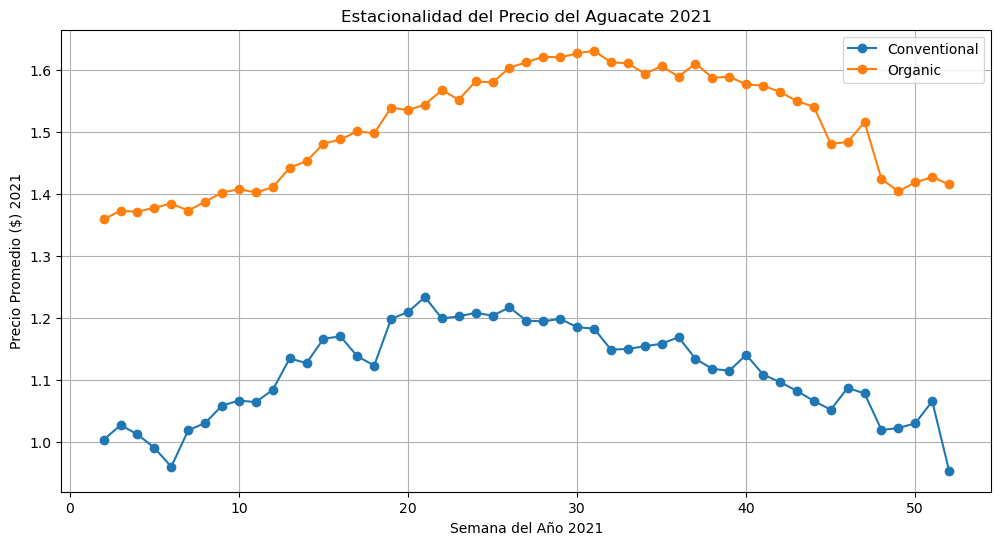

In [9]:
# Visualización de la estacionalidad
plt.figure(figsize=(12, 6))
plt.plot(seasonality_df['Week_Number'], seasonality_df['Conventional'], label='Conventional', marker='o')
plt.plot(seasonality_df['Week_Number'], seasonality_df['Organic'], label='Organic', marker='o')

plt.title('Estacionalidad del Precio del Aguacate 2021')
plt.xlabel('Semana del Año 2021')
plt.ylabel('Precio Promedio ($) 2021')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Extraer mes y año
# Crear columnas de Year y Month
filtered_df_greaterregions['Year'] = filtered_df_greaterregions['Current Year Week Ending'].dt.year
filtered_df_greaterregions['Month'] = filtered_df_greaterregions['Current Year Week Ending'].dt.month


C:\Users\heatb\AppData\Local\Temp\ipykernel_6224\1689713662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Year'] = filtered_df_greaterregions['Current Year Week Ending'].dt.year
C:\Users\heatb\AppData\Local\Temp\ipykernel_6224\1689713662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Month'] = filtered_df_greaterregions['Current Year Week Ending'].dt.month


In [11]:
# Filtrar nuevamente para asegurarse de que Year y Month estén presentes
df_conventional = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Conventional']
df_organic = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Organic']


In [12]:
# Agrupar por Year y Month para calcular promedios
monthly_conventional = (
    df_conventional.groupby(['Year', 'Month'])['ASP Current Year']
    .mean()
    .reset_index()
    .rename(columns={'ASP Current Year': 'Conventional'})
)

monthly_organic = (
    df_organic.groupby(['Year', 'Month'])['ASP Current Year']
    .mean()
    .reset_index()
    .rename(columns={'ASP Current Year': 'Organic'})
)

In [13]:
# Combinar ambos en un solo DataFrame
monthly_seasonality = pd.merge(
    monthly_conventional, 
    monthly_organic, 
    on=['Year', 'Month'], 
    how='outer'
)

# Crear etiquetas de tiempo
monthly_seasonality['Time'] = pd.to_datetime(
    monthly_seasonality[['Year', 'Month']].assign(Day=1)
).dt.strftime('%b %Y')

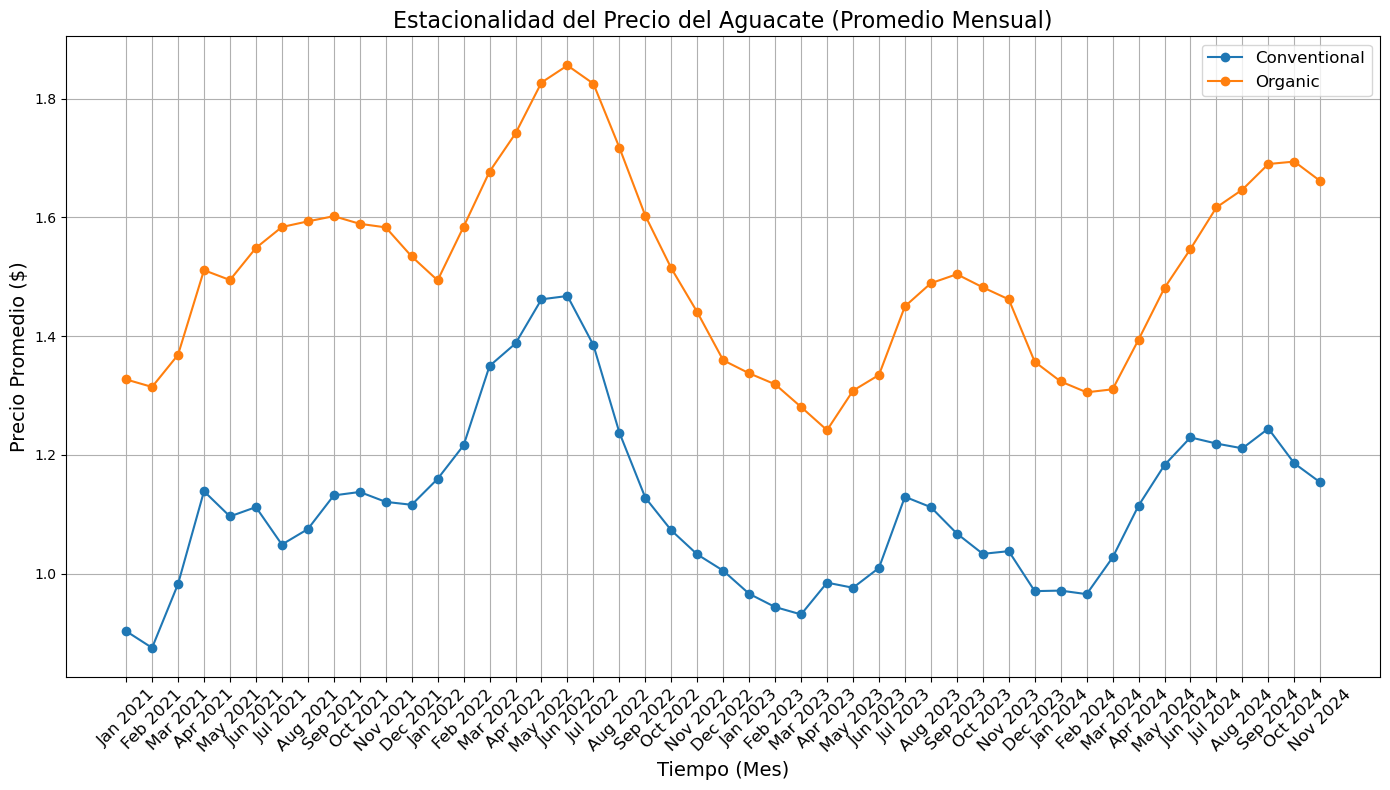

In [14]:
# Graficar
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.plot(monthly_seasonality['Time'], monthly_seasonality['Conventional'], label='Conventional', marker='o')
plt.plot(monthly_seasonality['Time'], monthly_seasonality['Organic'], label='Organic', marker='o')
plt.title('Estacionalidad del Precio del Aguacate (Promedio Mensual)', fontsize=16)
plt.xlabel('Tiempo (Mes)', fontsize=14)
plt.ylabel('Precio Promedio ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
#Recuperamos las variables definidas al principio de precio organico y precio convencional
#Las agrupamos por fechas para obtener el promedio diario
price_conventional = price_conventional.groupby('Current Year Week Ending').mean()
price_organic = price_organic.groupby('Current Year Week Ending').mean()

In [16]:
# Descomponemos la serie temporal de aguacates orgánicos
decompose_organic = seasonal_decompose(price_organic, model='additive', period=52)

# Descomponemos la serie temporal de aguacates convencionales
decompose_conventional = seasonal_decompose(price_conventional, model='additive', period=52)

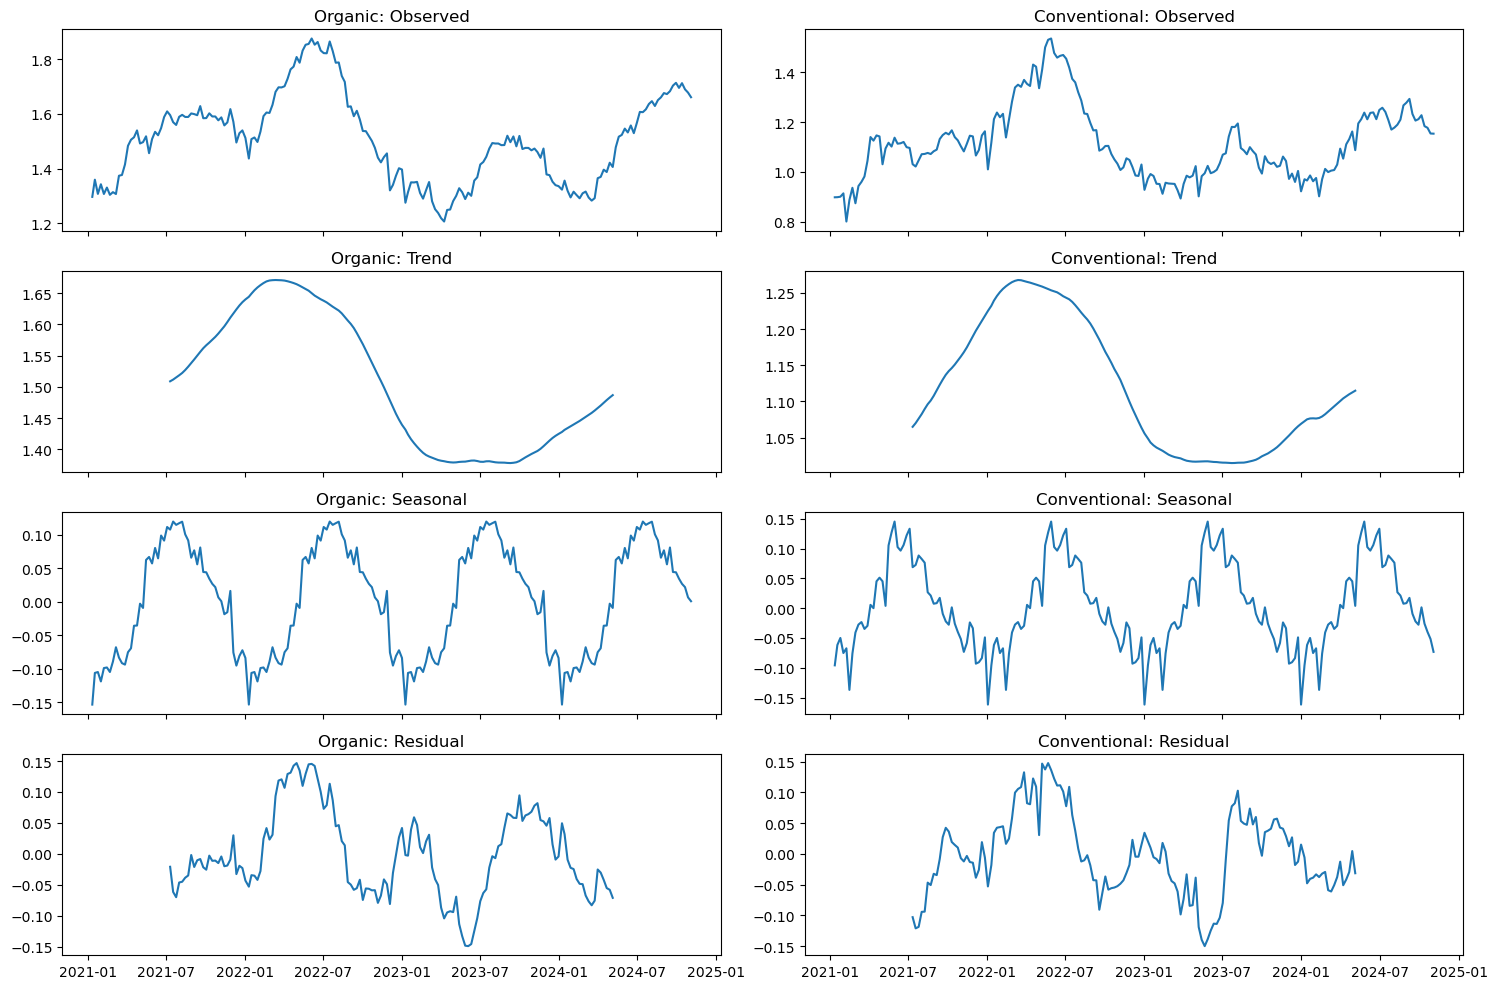

In [17]:
# Configuramos los gráficos
fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)

# Graficamos para aguacates orgánicos
axes[0, 0].plot(decompose_organic.observed, label='Observed')
axes[0, 0].set_title('Organic: Observed')
axes[1, 0].plot(decompose_organic.trend, label='Trend')
axes[1, 0].set_title('Organic: Trend')
axes[2, 0].plot(decompose_organic.seasonal, label='Seasonal')
axes[2, 0].set_title('Organic: Seasonal')
axes[3, 0].plot(decompose_organic.resid, label='Residual')
axes[3, 0].set_title('Organic: Residual')

# Graficamos para aguacates convencionales
axes[0, 1].plot(decompose_conventional.observed, label='Observed')
axes[0, 1].set_title('Conventional: Observed')
axes[1, 1].plot(decompose_conventional.trend, label='Trend')
axes[1, 1].set_title('Conventional: Trend')
axes[2, 1].plot(decompose_conventional.seasonal, label='Seasonal')
axes[2, 1].set_title('Conventional: Seasonal')
axes[3, 1].plot(decompose_conventional.resid, label='Residual')
axes[3, 1].set_title('Conventional: Residual')

# Ajustamos diseño
plt.tight_layout()

# Se muestran los gráficos
plt.show()

Teniendo el insight de que se produce una estacionalidad elevada durante los meses de verano, con picos en junio y julio, vamos a analizar por greater region que tal son las estacionalidades en cada región.

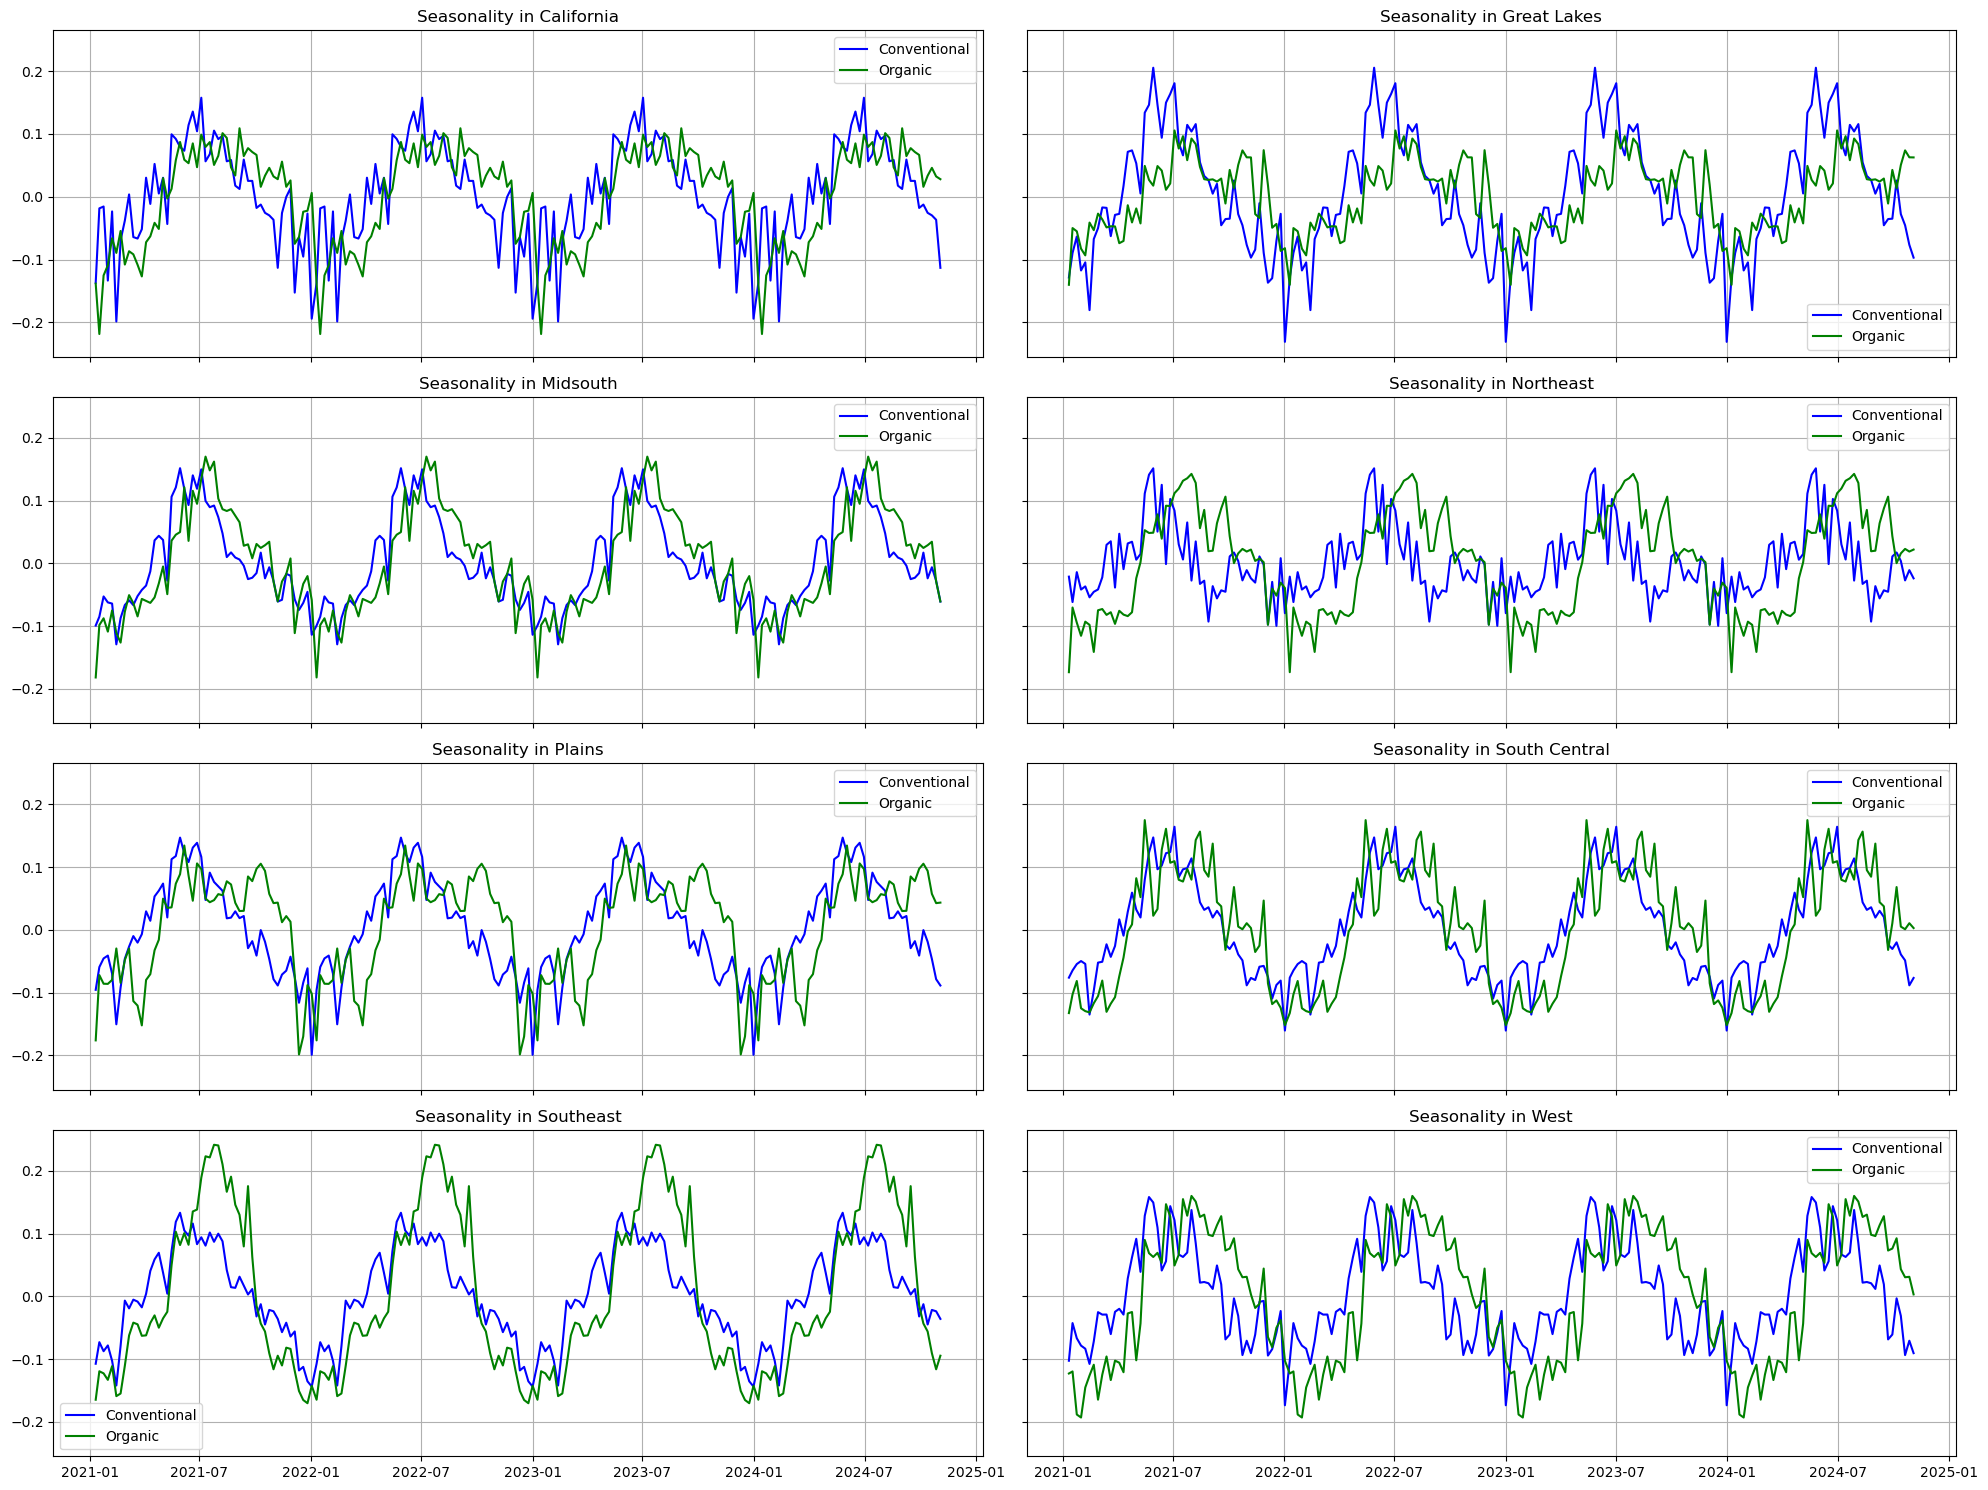

In [18]:
# Lista de regiones
greaterregions = ['California', 'Great Lakes', 'Midsouth', 'Northeast', 
                  'Plains', 'South Central', 'Southeast', 'West']

# Crear figura para graficar todas las regiones
fig, axes = plt.subplots(4, 2, figsize=(20, 15), sharex=True, sharey=True)
axes = axes.flatten()

# Iterar por cada región
for i, region in enumerate(greaterregions):
    # Filtrar datos para la región actual
    region_data = filtered_df_greaterregions[filtered_df_greaterregions['Geography'] == region]


    # Incluimos los datos de tipo de aguacate para cada region filtrada
    price_conventional = region_data[region_data['Type'] == 'Conventional'][['Current Year Week Ending', 'ASP Current Year']]
    price_organic = region_data[region_data['Type'] == 'Organic'][['Current Year Week Ending', 'ASP Current Year']]

    # Convertimos la columna de fecha a tipo datetime
    price_conventional['Current Year Week Ending'] = pd.to_datetime(price_conventional['Current Year Week Ending'])
    price_organic['Current Year Week Ending'] = pd.to_datetime(price_organic['Current Year Week Ending'])

    # Agrupamos por fecha obteniendo el promedio
    price_conventional = price_conventional.groupby('Current Year Week Ending').mean()
    price_organic = price_organic.groupby('Current Year Week Ending').mean()

    # Descomponemos otra vez la serie temporal
    decompose_conventional = seasonal_decompose(price_conventional, model='additive', period=52)
    decompose_organic = seasonal_decompose(price_organic, model='additive', period=52)

    # Graficar la componente estacional
    ax = axes[i]
    ax.plot(decompose_conventional.seasonal, label='Conventional', color='blue')
    ax.plot(decompose_organic.seasonal, label='Organic', color='green')
    ax.set_title(f'Seasonality in {region}')
    ax.legend()
    ax.grid()

# Ajustar diseño
plt.tight_layout()
plt.show()

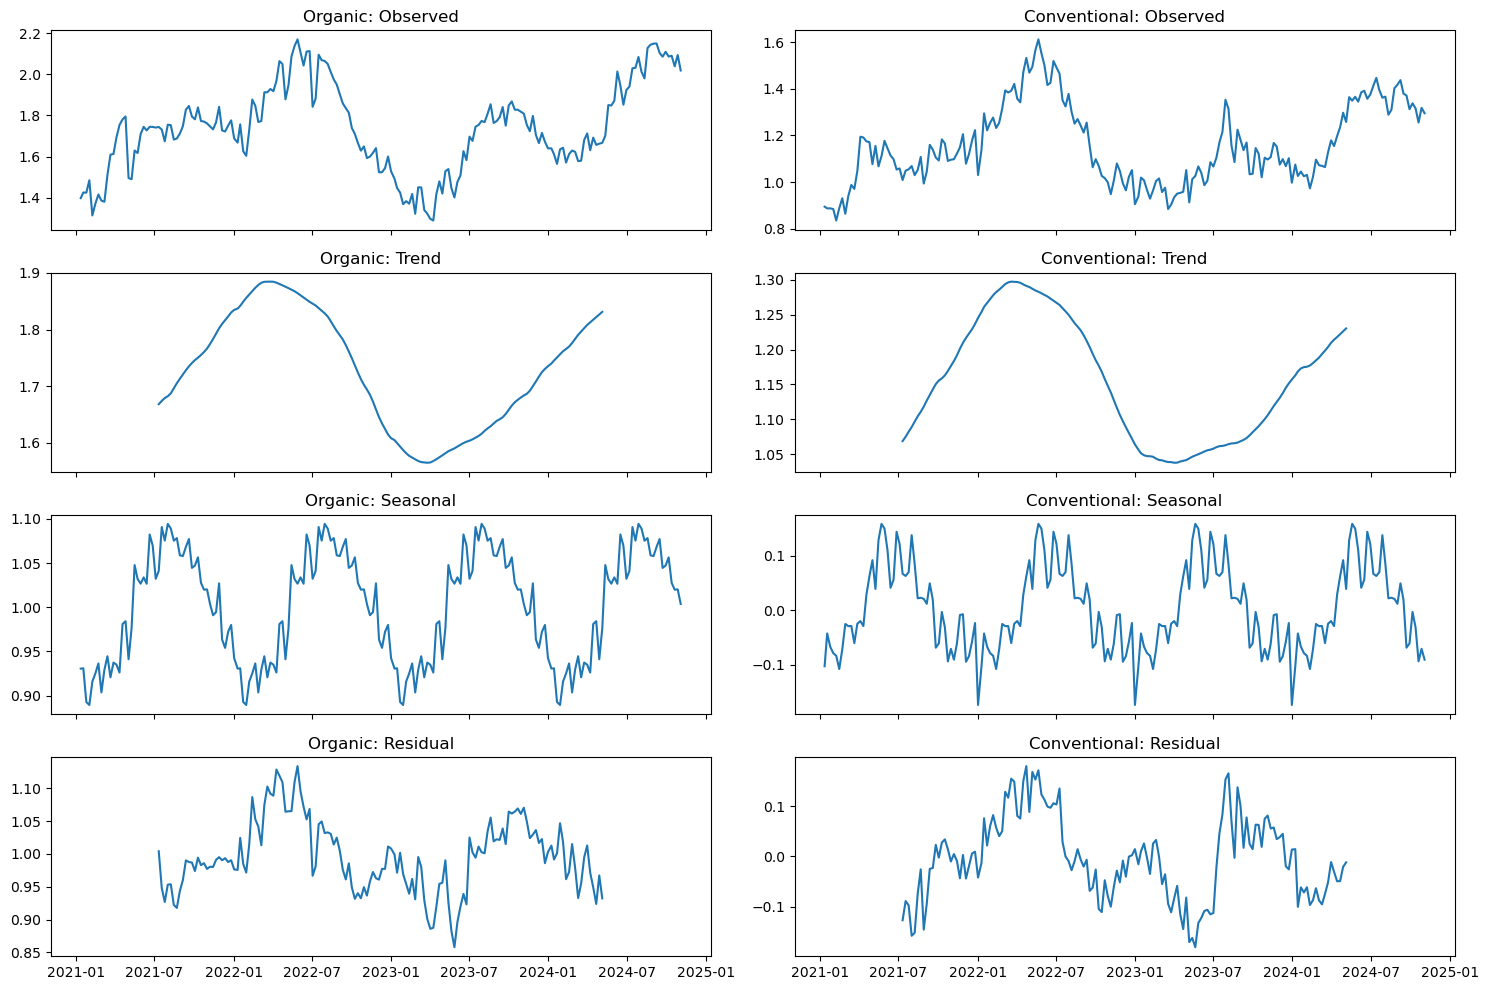

In [27]:
# Intentamos una descomposición multiplicativa
decompose_organic_mult = seasonal_decompose(price_organic, model='multiplicative', period=52)

# Graficamos los resultados de la descomposición multiplicativa
fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)

# Graficamos para aguacates orgánicos
axes[0, 0].plot(decompose_organic_mult.observed, label='Observed')
axes[0, 0].set_title('Organic: Observed')
axes[1, 0].plot(decompose_organic_mult.trend, label='Trend')
axes[1, 0].set_title('Organic: Trend')
axes[2, 0].plot(decompose_organic_mult.seasonal, label='Seasonal')
axes[2, 0].set_title('Organic: Seasonal')
axes[3, 0].plot(decompose_organic_mult.resid, label='Residual')
axes[3, 0].set_title('Organic: Residual')

# Graficamos para aguacates convencionales
axes[0, 1].plot(decompose_conventional.observed, label='Observed')
axes[0, 1].set_title('Conventional: Observed')
axes[1, 1].plot(decompose_conventional.trend, label='Trend')
axes[1, 1].set_title('Conventional: Trend')
axes[2, 1].plot(decompose_conventional.seasonal, label='Seasonal')
axes[2, 1].set_title('Conventional: Seasonal')
axes[3, 1].plot(decompose_conventional.resid, label='Residual')
axes[3, 1].set_title('Conventional: Residual')

# Ajustamos diseño
plt.tight_layout()

# Se muestran los gráficos
plt.show()


Primeros valores de la tendencia interpolada:                           ASP Current Year
Current Year Week Ending                  
2021-01-11                        1.397372
2021-01-17                        1.401614
2021-01-24                        1.405070
2021-01-31                        1.417270
2021-02-07                        1.401315
2021-02-14                        1.396608
2021-02-21                        1.399495
2021-02-28                        1.397335
2021-03-07                        1.394656
2021-03-14                        1.412511
Últimos valores de la tendencia interpolada:                           ASP Current Year
Current Year Week Ending                  
2024-09-01                        2.023489
2024-09-08                        2.042925
2024-09-15                        2.052328
2024-09-22                        2.057475
2024-09-29                        2.065441
2024-10-06                        2.068655
2024-10-13                        2.071944
2024-1

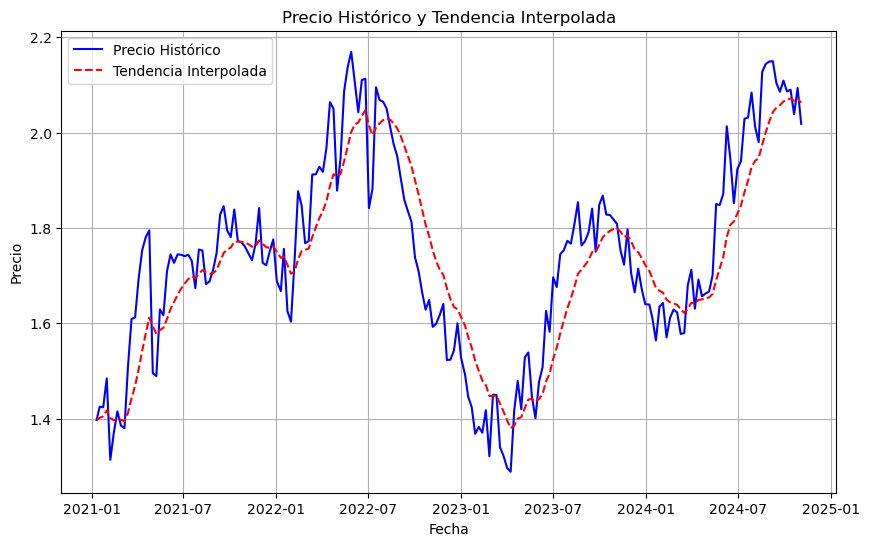

In [30]:
# Interpolación para completar los NaNs de la tendencia
tendencia_interpolada = tendencia_exponencial.interpolate(method='linear')

# Verificamos los primeros y últimos valores de la tendencia interpolada
print("Primeros valores de la tendencia interpolada:", tendencia_interpolada.head(10))
print("Últimos valores de la tendencia interpolada:", tendencia_interpolada.tail(10))

# Graficamos el histórico y la tendencia interpolada
plt.figure(figsize=(10, 6))
plt.plot(price_organic.index, price_organic.values, label='Precio Histórico', color='blue')
plt.plot(tendencia_interpolada.index, tendencia_interpolada.values, label='Tendencia Interpolada', color='red', linestyle='--')
plt.legend()
plt.title('Precio Histórico y Tendencia Interpolada')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


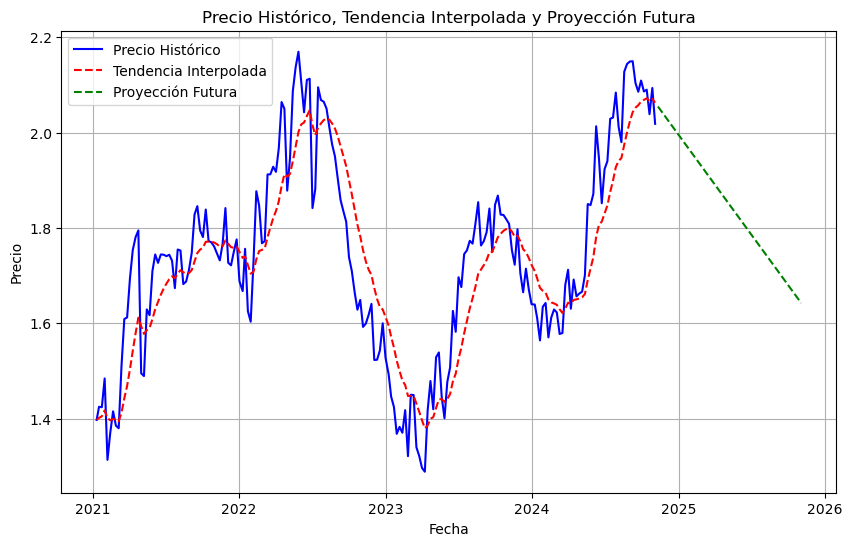

In [32]:
# Calculamos la última diferencia de la tendencia
ultima_diferencia = tendencia_interpolada.diff().iloc[-1]  # Última diferencia en la tendencia

# Proyectamos la tendencia futura utilizando esta diferencia
tendencia_futura = [tendencia_interpolada.iloc[-1] + (i * ultima_diferencia) for i in range(1, periodos_futuros + 1)]

# Creamos las fechas futuras
fechas_futuras = pd.date_range(price_organic.index[-1], periods=periodos_futuros + 1, freq='W')[1:]

# Creamos una Serie para la proyección futura
proyeccion_futura = pd.Series(tendencia_futura, index=fechas_futuras)

# Graficamos la tendencia histórica, la interpolada y la proyección futura
plt.figure(figsize=(10, 6))
plt.plot(price_organic.index, price_organic.values, label='Precio Histórico', color='blue')
plt.plot(tendencia_interpolada.index, tendencia_interpolada.values, label='Tendencia Interpolada', color='red', linestyle='--')
plt.plot(proyeccion_futura.index, proyeccion_futura.values, label='Proyección Futura', color='green', linestyle='--')
plt.legend()
plt.title('Precio Histórico, Tendencia Interpolada y Proyección Futura')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid(True)
plt.show()
